# Teil 0 - Iris-Datensatz und Formale Grundlagen

## Iris-Datensatz

Für die folgende Übung werden wir mit der Iris-Datensammlung arbeiten, einem klassischen Beispiel für den Bereich des Machine Learnings. Hierbei handelt es sich um Messdaten von 150 Schwertlilien dreier verschiedener Arten:
* Iris-setosa (n=50)
* Iris-versicolor (n=50)
* Iris-virginica (n=50)

Jedes der Blumenexemplare (Sample) wird in dieser Datensammlung durch eine Zeile repräsentiert. In den einzelnen Spalten stehen die in Zentimetern angegebenen Messdaten, welche auch als <i>Merkmale (Features)</i> der Datenmenge bezeichnet werden. Diese Merkmale sind die folgenden:

* Sepal length [in cm]
* Sepal width [in cm]
* Petal length [in cm]
* Petal width [in cm]

<img src="./Figures/Iris-Datensammlung.png" alt="drawing" style="width:800px;"/>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("./Data/iris.data", header=None, sep=",")
df.rename(columns={0:'sepal_length', 1:'sepal_width', 2:'petal_length', 3:'petal_width', 4:'class_label'}, inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class_label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Visualisierung Iris-Datensatz: Sepal length, Sepal width

Visualisieren Sie die Merkmale *Sepal Length* und *Sepal Width* aller drei Klassen nach Farben getrennt. <br>


Zum Beispiel:
<img src="./Figures/Sepal.png" alt="drawing" style="width:400px;"/>

<function matplotlib.pyplot.show(*args, **kw)>

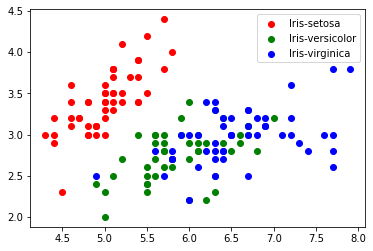

In [21]:
groups = df.groupby('class_label')
for name, group in groups:
    color = 'r'
    if('versicolor' in name):
        color = 'g'
    if('virginica' in name):
        color = 'b'
    plt.scatter(group.sepal_length, group.sepal_width, label=name, color=color)
plt.legend()
plt.show

## Visualisierung Iris-Datensatz: Petal length, Petal width

Visualisieren Sie die Merkmale *Petal Length* und *Petal Width* aller drei Klassen nach Farben getrennt. <br>


Zum Beispiel:
<img src="./Figures/Petal.png" alt="drawing" style="width:400px;"/>

<function matplotlib.pyplot.show(*args, **kw)>

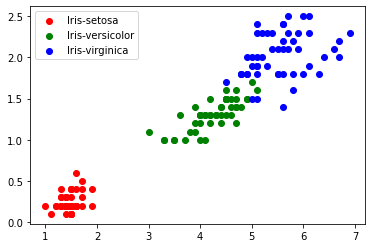

In [22]:
for name, group in groups:
    color = 'r'
    if('versicolor' in name):
        color = 'g'
    if('virginica' in name):
        color = 'b'
    plt.scatter(group.petal_length, group.petal_width, label=name, color=color)
plt.legend()
plt.show

## Formale Grundlagen

Zur Notation werden die Grundlagen der <i>linearen Algebra</i> genutzt. Die folgenden Erläuterungen und Aufgabenstellungen verwenden die Matrizen- und Vektornotation zur Beschreibung der Daten. Es gilt die Konvention, dass jedes Objekt durch eine Zeile in der Merkmalsmatrix <b>X</b> repräsentiert und jedes Merkmal als eigene Spalte gespeichert wird. <br>

Die Iris-Datensammlung besteht aus 150 Datensätzen mit jeweils vier Merkmalen und kann somit als 150x4 Matrix <b>X</b> $\in \mathbb R^{150x4}$ geschrieben werden:

$ 
X = \begin{pmatrix} 
x_1^{(1)} & x_2^{(1)} & x_3^{(1)} & x_4^{(1)}  \\ 
x_1^{(2)} & x_2^{(2)} & x_3^{(2)} & x_4^{(2)}  \\ 
\vdots & \vdots & \vdots & \vdots \\
x_1^{(150)} & x_2^{(150)} & x_3^{(150)} & x_4^{(150)}  \\
\end{pmatrix}
$

Mit einem hochgestellten <b>(i)</b> wird auf das i-te Trainingsobjekt verwiesen, mit einem tiefgestelltem <b>j</b> wird auf die j-te Dimension der Datenmenge verwiesen. Vektoren werden als Kleinbuchstaben (<b>$\vec{x}$</b> $\in \mathbb R^{nx1}$), Matrizen als Großbuchstaben (<b>X</b> $\in \mathbb R^{nxm}$) notiert. Beispielsweise verweist $x^{(150)}_1$ auf die erste Dimension des Blütenexemplars 150. <br>

Jede Zeile der Merkmalsmatrix repräsentiert ein Blütenexemplar und kann als vierdimensionaler Zeilenvektor <b>$\vec{x}$</b> $\in \mathbb R^{1x4}$ geschrieben werden:
$
\vec{x}^{(i)T} = 
\begin{pmatrix} 
x_1^{(i)} & x_2^{(i)} & x_3^{(i)} & x_4^{(i)} 
\end{pmatrix}  
$

Der erste Merkmalsvektor des Datensatzes ist der folgende: <br>
$
\vec{x}^{(1)T} = 
\begin{pmatrix} 
5.1^{(1)} & 3.5^{(1)} & 1.4^{(1)} & 0.2^{(1)} 
\end{pmatrix}  
$

Jede Merkmaldimension ist ein 150-dimensionaler Spaltenvektor $\vec{x}_j \in \mathbb R^{150x1}$:

$
\vec{x}_j = 
\begin{pmatrix} 
x_j^{(1)} \\ 
x_j^{(2)} \\ 
\vdots \\
x_j^{(150)} \\ 
\end{pmatrix}  
$

Die Zielvariablen (in diesem Fall die Klassenbezeichnungen) werden ebenfalls als 150-dimensionaler Spaltenvektor notiert:

$
\vec{y} = 
\begin{pmatrix} 
y^{(1)} \\ 
y^{(2)} \\ 
\vdots \\
y^{(150)} \\ 
\end{pmatrix}   
(y \in {\text{Setosa}, \text{Versicolor}, \text{Virginica}})
$

## Aufbau eines neuronalen Netzes


<img src="./Figures/neural_network2.png" alt="drawing" style="width:800px;"/>


Die Aufgabe des Netzes besteht darin, Input-Werte entgegenzunehmen und eine Klassifizierung durchzuführen.

<b>Input-Werte</b>: <br>
Die Merkmalsmatrix <b>X</b> stellt sämtliche Input-Werte und somit die Eingangssignale für das neuronale Netz, dar. Die einzelnen Merkmale pro Exemplar werden als Vektor zusammengefasst. Ein Beispiel für den ersten Eingangsvektor ist nach wie vor folgender Vektor:

$
\vec{x}^{(1)T} = 
\begin{pmatrix} 
5.1^{(1)} & 3.5^{(1)} & 1.4^{(1)} & 0.2^{(1)} 
\end{pmatrix}  
$


<b>Input-Neuron</b>: <br>
Ein Input-Neuron reicht die Input-Werte an die nächste Schicht weiter.

<b>Gewichte</b>: <br>
Gewichte stellen Verbindungen zwischen Neuronen dar. Diese werden als  Zahlenwerte $w_1, w_2, ..., w_n$ abgebildet. D.h für jedes Eingangssignal ein Gewichtswert. Die Gesamtheit der Gewichte wird als Gewichtsvektor $\vec{w}$ bezeichnet.

<b>Output-Neuron</b>: <br>
Jedes einzelne Output-Neuron zählt sämtliche Werte seiner Eingänge zusammen. Jeder Eingangswert wird mit dem korrespondierenden Gewicht der Eingangsverbindung multipliziert. Diese Summe wird als <i>gewichtete Summe</i> (auch:  Nettoeingabe) bezeichnet. Das Gewicht regelt den Anteil des Eingangswerts auf die Eingangssumme. So bewirkt bspw. ein Gewicht von 0, dass der Eingangswert keinerlei Einfluss hat.<br>

gewichtete Summe s= $\sum^{n}_{i=1} x_i \cdot w_i.$ <br>
Bsp.1: $s(o_1)=  5.1 \cdot 1 + 3.5 \cdot 1 + 1.4 \cdot 1 + 0.2 \cdot 1 = 10.2$ <br>

<b>Aktivierungsfunktion</b>: <br>
Jedes Output-Neuron übergibt die gewichtete Summe an eine Funktion. Hierbei handelt es sich um die Aktivierungsfunktion $f_{akt}(s)$ oder auch Phi $\phi(s)$. Diese nimmt eine Linearkombination der Eingabewerte $\vec{x}$ und Gewichtungsvektor $\vec{w}$ entgegen. Wenn die Aktivierungsfunktion eines bestimmten Objektes $\vec{x}^{(i)}$ (d.h. die Ausgabe von $\phi(s)$) einen bestimmten Schwellenwert $\theta$ überschreitet, wird die Klasse 1 vorhergesagt, anderenfalls die Klasse 0. Diese Vorhersage liefert letztendlich die Ausgabe. Der Ausgabewert ist die von der Sprungfuntion vorhergesagten Klassenbezeichnung. Eine Ausprägung solch einer Aktivierungsfunktion ist die Stufenfunktion (engl. step function). In der Funktion erfolgt ein Vergleich zwischen der Summe mit einem <i>Schwellenwert</i>. Dabei kann der Schwellenwert einen beliebigen Wert annehmen. Falls der Schwellenwert 0 ist, wird die Stufenfunktion als <i>Heaviside</i>-Funktion bezeichnet. Die Ausgabewerte sind 0 bzw. 1. Wenn der Vergleichswert kleiner als der Schwellenwert ist, ist der Output 0, ansonsten 1. 

<img src="./Figures/heaviside.png" alt="drawing" style="width:300px;"/>

Folgende Abbildung zeigt, wie die Aktivierungsfunktion dazu verwendet werden kann, zwei linear trennbare Klassen zu unterscheiden.
<img src="./Figures/linear_trennbar.png" alt="drawing" style="width:300px;"/>

<b>Fehlerberechnung</b>: <br>
Der berechnete Output des neuronalen Netzes wird mit dem gewünschten Output verglichen und davon abhängig der Fehler gemessen.

<b>Feed-Forward-Netzwerk</b>: <br>
Auf dem Weg vom Input zum Output leitet das Netz die Werte von Schicht zu Schicht, nach vorn gerichtet. Diese Form nennt sich Feed-Forward-Netzwerk (engl. für vorwärtsgerichtete Netze). Dem gegenüber stehen Recurrent Networks (engl. für rückgekoppelte Netze). Bei diesen existieren Rückkopplungen zwischen den gleichen und vorangegangenen Schichten. Diese sind jedoch nicht Bestandteil des Labors.